In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
# Assign the class to a variable
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [10]:
# Calculate x_bin date location
x_bin_date = dt.date(2016, 8, 23) + dt.timedelta(days=219)
x_bin_date

datetime.date(2017, 3, 30)

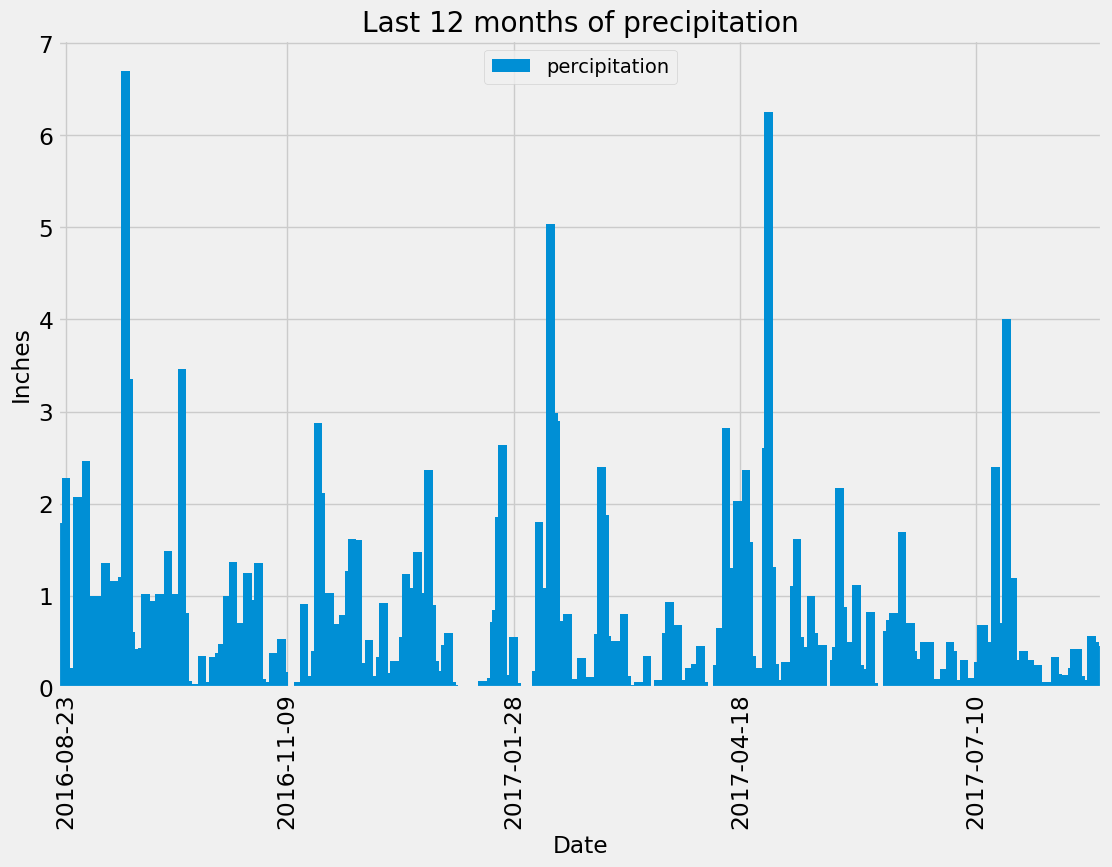

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago_date

# Perform a query to retrieve the data and precipitation scores
one_year_prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(one_year_prcp_data, columns=['date', 'prcp'])

# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])
df_grouped = df.sort_values(by=['date'], ascending=False).groupby(['date'])['prcp'].max()

#Create tick location and lable for x-axes
#x_bin = [dt.date(2016, 8, 23), dt.date(2016, 11, 9), dt.date(2017, 1, 28), dt.date(2017, 4, 18), dt.date(2017, 7, 10)] 
x_bin = [1, 79, 159, 239, 322]
x_labels = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'] 

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
df_grouped.plot.bar(x=np.arange(len('date')), y='prcp', title="Last 12 months of precipitation",
                    figsize=(12,8), xlabel="Date", ylabel="Inches", width=3, align='center',
                    label='percipitation', fontsize='large')
plt.xticks(x_bin, x_labels, rotation ='vertical') 
plt.legend(loc = 'upper center')
plt.show();



In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
print('     percipitation')
print(df['prcp'].describe())

     percipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_number_of_stations = session.query(Station.station).count()
total_number_of_stations

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from numpy import mean
tobs = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
list_tobs = []
tobs_min = list_tobs.append(min(tobs))
tobs_max = list_tobs.append(max(tobs))
tobs_avg = list_tobs.append(mean(tobs))
list_tobs

[(54.0,), (85.0,), 71.66378066378067]

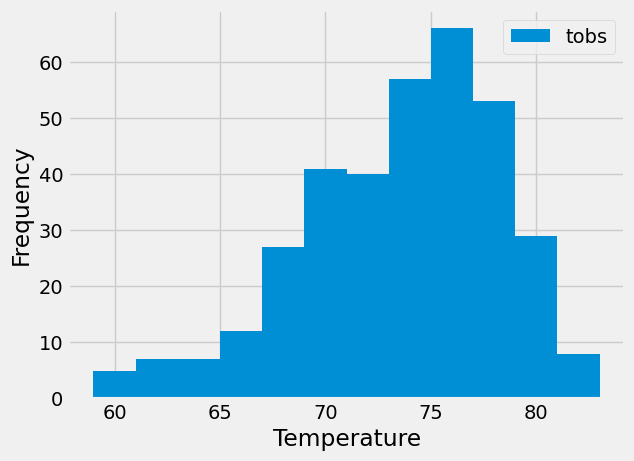

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Perform a query to retrieve the tobs
one_year_tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_date).\
    filter(Measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_tobs = pd.DataFrame(one_year_tobs_data, columns=['tobs'])

# plot the results as a histogram
plt.hist(df_tobs['tobs'], bins = 12, label = 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc = "upper right")
plt.show()

# Close Session

In [22]:
# Close Session
session.close()